<h2 style='color:purple' align='center'>Implémentation d’un Réseau de Neurones Convolutif pour la Classification d’Images avec TensorFlow sur Google Colab</h2>

---

    Dans ce Notebook, nous allons classer de petites images du jeu de données cifar10 de TensorFlow Keras. Il y a un total de 10 classes comme indiqué ci-dessous. Nous utiliserons un réseau de neurones convolutionnel (CNN) pour la classification.

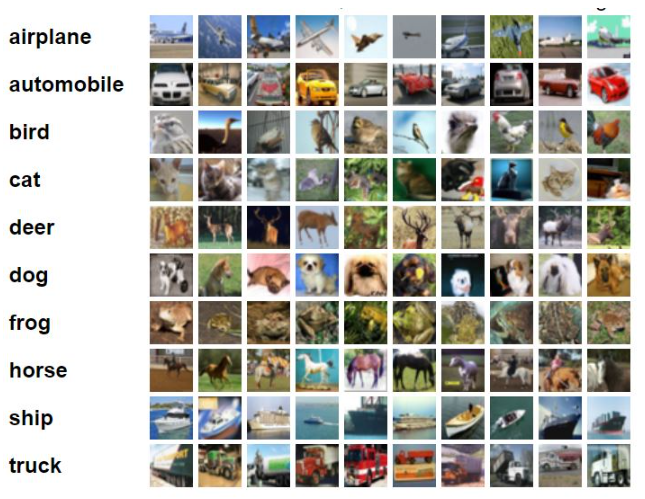

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:#873F0C">Charger le jeu de données.</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 77s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

---
> * **Ici, nous constatons qu'il y a 50 000 images d'entraînement et 1 000 images de test.**
---

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

---
> * **y_train est actuellement une matrice 2D. Pour notre classification, avoir un tableau 1D est suffisant. Nous allons donc le convertir en un tableau 1D.**
---

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

---
> * **Traçons quelques images pour voir de quoi il s'agit.**
---

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

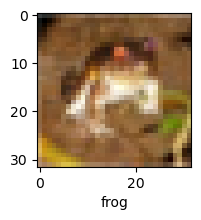

In [10]:
plot_sample(X_train, y_train, 0)

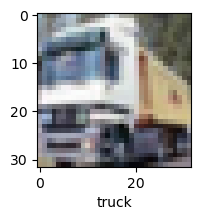

In [11]:
plot_sample(X_train, y_train, 1)

---
> * **Normalisons les images pour qu'elles soient comprises entre 0 et 1. Une image a 3 canaux (Rouge, Vert, Bleu) et chaque valeur dans le canal peut varier de 0 à 255. Par conséquent, pour normaliser dans la plage de 0 à 1, nous devons diviser par 255.**
---

<h4 style="color:#873F0C">Normaliser les images</h4>

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:#873F0C">Création d'un modèle ANN</h4>

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_ann= ann.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 94s 59ms/step - loss: 1.8112 - accuracy: 0.3541 - val_loss: 1.7076 - val_accuracy: 0.3998
Epoch 2/5
1563/1563 [==============================] - 99s 64ms/step - loss: 1.6232 - accuracy: 0.4273 - val_loss: 1.6322 - val_accuracy: 0.4062
Epoch 3/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.5391 - accuracy: 0.4568 - val_loss: 1.5656 - val_accuracy: 0.4352
Epoch 4/5
1563/1563 [==============================] - 90s 57ms/step - loss: 1.4800 - accuracy: 0.4782 - val_loss: 1.4670 - val_accuracy: 0.4807
Epoch 5/5
1563/1563 [==============================] - 94s 60ms/step - loss: 1.4319 - accuracy: 0.4962 - val_loss: 1.4572 - val_accuracy: 0.4751


---
> * **Vous pouvez voir qu'à la fin de 5 époques, la précision est d'environ 49%.**
---

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 14ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.49      0.54      1000
           1       0.46      0.78      0.57      1000
           2       0.43      0.23      0.30      1000
           3       0.41      0.19      0.26      1000
           4       0.38      0.51      0.44      1000
           5       0.33      0.53      0.41      1000
           6       0.54      0.52      0.53      1000
           7       0.68      0.41      0.51      1000
           8       0.52      0.73      0.61      1000
           9       0.61      0.38      0.47      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.46     10000
weighted avg       0.50      0.48      0.46     10000



---
> * **On va tracer maintenant les courbes d'apprentissage**
---

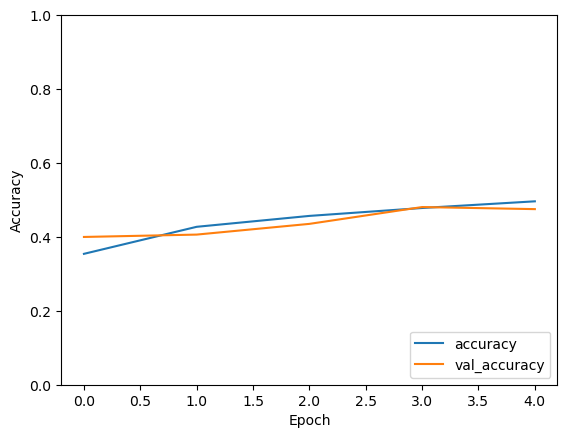

In [15]:
plt.plot(history_ann.history['accuracy'], label='accuracy')
plt.plot(history_ann.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

<h4 style="color:#873F0C">Maintenant, construisons un réseau de neurones convolutionnel CNN pour entraîner nos images.</h4>

<h6 style="color:orange">Création du modèle CNN</h6>

In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

<h6 style="color:orange">Compilation du modèle</h6>

In [17]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<h6 style="color:orange">Entraînement du modèle</h6>

In [18]:
history= cnn.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 46s 28ms/step - loss: 1.4618 - accuracy: 0.4745 - val_loss: 1.1998 - val_accuracy: 0.5813
Epoch 2/10
1563/1563 [==============================] - 41s 27ms/step - loss: 1.1153 - accuracy: 0.6096 - val_loss: 1.0698 - val_accuracy: 0.6257
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9791 - accuracy: 0.6593 - val_loss: 1.0795 - val_accuracy: 0.6307
Epoch 4/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8973 - accuracy: 0.6893 - val_loss: 0.9716 - val_accuracy: 0.6657
Epoch 5/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8327 - accuracy: 0.7110 - val_loss: 0.9236 - val_accuracy: 0.6857
Epoch 6/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7750 - accuracy: 0.7328 - val_loss: 0.8815 - val_accuracy: 0.6957
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7279 - accuracy: 0.7477 - val_loss: 0.8907 -

---
> * **Avec le CNN, à la fin de 5 époques, la précision était d'environ 68%, ce qui représente une amélioration significative par rapport au réseau neuronal artificiel (ANN). Les CNN sont les meilleurs pour la classification d'images et offrent une précision exceptionnelle. De plus, le calcul est bien inférieur par rapport à un simple ANN car le max pooling réduit les dimensions de l'image tout en préservant les caractéristiques.**
---

<h6 style="color:orange">Rapport de classification</h6>

In [19]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 9ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.76      0.74      1000
           1       0.82      0.83      0.83      1000
           2       0.61      0.56      0.58      1000
           3       0.59      0.42      0.49      1000
           4       0.67      0.64      0.66      1000
           5       0.60      0.62      0.61      1000
           6       0.75      0.80      0.77      1000
           7       0.73      0.77      0.75      1000
           8       0.76      0.83      0.80      1000
           9       0.74      0.81      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



<h6 style="color:orange">Évaluation et analyse</h6>

In [20]:
test_loss, test_acc= cnn.evaluate(X_test,y_test)
print(f'\nTest accuracy: {test_acc}')
print(f'\nTest loss: {test_loss}')

313/313 [==============================] - 3s 9ms/step - loss: 0.9232 - accuracy: 0.7039

Test accuracy: 0.7038999795913696

Test loss: 0.9232457280158997


<h6 style="color:orange">Tracer les courbes d'apprentissage</h6>

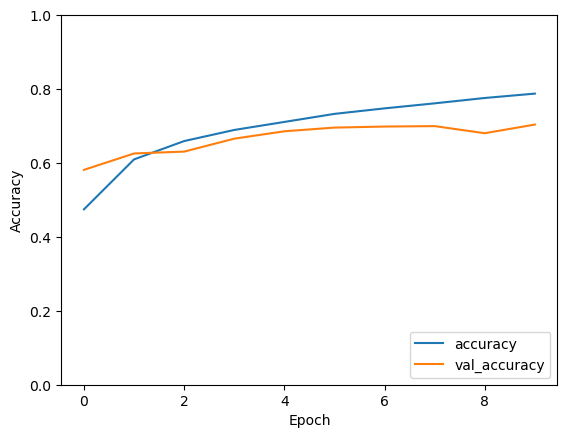

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

<h6 style="color:orange">Afficher quelques prédictions</h6>

In [22]:
y_pred[:5]

array([[3.81411432e-04, 1.25833787e-06, 5.25663549e-04, 3.53327036e-01,
        1.26436105e-04, 6.39440060e-01, 4.51074680e-03, 3.17685726e-06,
        1.68273214e-03, 1.51042752e-06],
       [5.74072066e-04, 1.28347818e-02, 3.11518352e-06, 8.30733740e-08,
        3.20233653e-08, 8.29708358e-10, 2.60246708e-07, 4.65156219e-10,
        9.86492217e-01, 9.55463693e-05],
       [1.89860668e-02, 1.88911974e-01, 5.82243269e-03, 3.41408653e-03,
        1.26495637e-04, 2.98798463e-04, 5.26691074e-05, 2.70809187e-03,
        6.82202876e-01, 9.74765569e-02],
       [8.63810480e-01, 1.51726035e-02, 4.25867410e-03, 5.65385388e-04,
        1.13998458e-03, 4.35550355e-05, 1.17986601e-04, 8.69214855e-05,
        1.10415526e-01, 4.38886043e-03],
       [1.81803074e-07, 8.69433279e-07, 5.70454577e-04, 2.71772984e-02,
        9.54740167e-01, 1.09980651e-03, 1.64082125e-02, 8.37465677e-07,
        6.04518732e-07, 1.54591862e-06]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 8, 0, 4]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

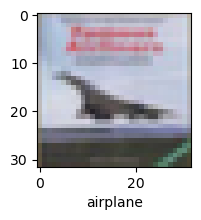

In [25]:
plot_sample(X_test, y_test,3)

In [26]:
classes[y_classes[3]]

'airplane'

In [27]:
classes[y_classes[3]]

'airplane'

<h2 style='color:purple' align='center'>Fin</h2>

---